# Computer vision learnings

In [17]:
import numpy as np
import pandas as pd
from datetime import datetime
import time

import matplotlib.pyplot as plt

import math
import json

import cv2
# import tensorflow as tf

In [3]:
# What and how many CPUs & GPUs I have
cpus = tf.config.experimental.list_physical_devices('CPU')
gpus = tf.config.experimental.list_physical_devices('GPU')
cpus, gpus

([PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')], [])

In [7]:
# reading an image using cv2
img = cv2.imread('C:/Users/peter/images_2/4-2023-12-28 225749.252401.jpg')

## Explore what what parameters I need for images to train on
- What pixel size?
- What image processing?

I'm inclined to use 80 x 45 images in gray scale or  54 x 30

In [8]:
img.shape

(180, 320, 3)

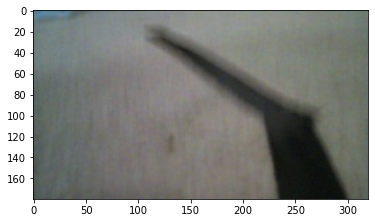

In [9]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

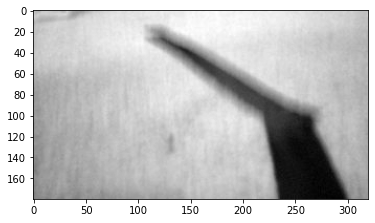

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cmap='gray')

In [15]:
resized_image = cv2.resize(img, (54, 30))
greyed_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

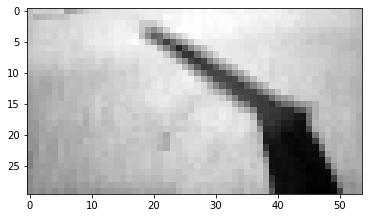

In [16]:
plt.imshow(greyed_image, cmap='gray')

In [17]:
ret, thresholded_image = cv2.threshold(greyed_image, 70, 255, cv2.THRESH_BINARY)

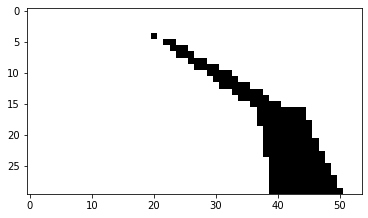

In [18]:
plt.imshow(thresholded_image, cmap='gray') # I'm afraid this thresholding technique can backfire in different lighting conditions

## Get images from Datafram
useful for understanding and organising training data

In [2]:
data = pd.read_csv('output.csv')

In [37]:
image_row = 3

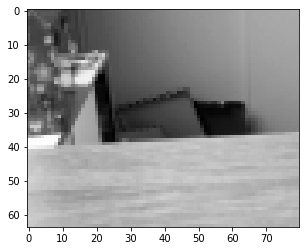

3


In [38]:
# get the image by location (as json format)
img_as_json = data['img'][image_row]

# convert the json to nested list
img_as_list = json.loads(img_as_json)

# convert the nested list to np.array
img = np.array(img_as_list)

# show the image
plt.imshow(img, cmap='gray')
plt.show()
print(image_row)

### Steps:
1. Get image data
2. Process image data
3. Create and train model
4. test model

#### 3. Create model

source: https://github.com/nicknochnack/ImageClassification/blob/main/Getting%20Started.ipynb

In [ ]:
# scale data
data = data.map(lambda x,y: (x/255, y))

In [ ]:
#Train model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# initiate model
model = Sequential()

# build model
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Show model summary
model.summary()